<a href="https://colab.research.google.com/github/CristobalSVM/Procesamiento_Clasificacion_Datos/blob/main/Pr%C3%A1ctica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctica 2: Dependiendo del tipo de datos que Uds. estén
manejando para su proyecto, van a realizar un análisis inicial de sus datos. Justifiquen el
uso de ellos, y como están orientados a resolver su problemática propuesta.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos (supongamos que tu conjunto de datos se llama 'datos.csv')
df = pd.read_excel('/content/MCD BD RENOV.xlsx')


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Territorio   927 non-null    object 
 1   Ciclo        927 non-null    int64  
 2   Integrantes  927 non-null    int64  
 3   Monto        927 non-null    float64
 4   Renovado     927 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 36.3+ KB
None


Se tienen 5 variables, 1 dependiente que de renvación 1 para sí y 0 para no de tipo entero, Ciclo e intregantes de tipo entero, monto de tipo flotante y territorio de tipo objeto.

In [5]:
print(df.head())

  Territorio  Ciclo  Integrantes     Monto  Renovado
0     CENTRO      1            8   64400.0         1
1     CENTRO      6            6   81000.0         1
2     CENTRO      8            6  104000.0         1
3     CENTRO      0            7   33000.0         0
4     CENTRO     10            6   52000.0         1


Al mostrar los primeros 5 registros se confirman con los datos lo mostrado anteriormente.

In [4]:
print(df.describe())

            Ciclo  Integrantes          Monto    Renovado
count  927.000000   927.000000     927.000000  927.000000
mean     7.138080     7.653722  116609.812945    0.660194
std      9.320564     2.753722   94570.163168    0.473899
min      0.000000     3.000000   25000.000000    0.000000
25%      1.000000     6.000000   54800.000000    0.000000
50%      3.000000     7.000000   91000.000000    1.000000
75%     10.000000     8.000000  145000.000000    1.000000
max     48.000000    40.000000  827000.000000    1.000000 0


En los datos descriptivos se tiene lo siguiente:

que la medía para cada variables es de 7 ciclos, 8 para integrantes, 1166609.81 para monto y de 66.02% para las renovaciones.

In [20]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con tus variables categóricas

# Estadísticas de una variable categórica
variable_categorica = 'Territorio'

# 1. Recuento de ocurrencias
recuento_ocurrencias = df[variable_categorica].value_counts()

# 2. Frecuencia relativa
frecuencia_relativa = df[variable_categorica].value_counts(normalize=True)

# 3. Moda
moda_variable = df[variable_categorica].mode()

# Mostrar resultados
print(f"Recuento de ocurrencias de {variable_categorica}:\n{recuento_ocurrencias}\n")
print(f"Frecuencia relativa de {variable_categorica}:\n{frecuencia_relativa}\n")
print(f"Moda de {variable_categorica}:\n{moda_variable}\n")


Recuento de ocurrencias de Territorio:
NORTE     325
CENTRO    309
SUR       293
Name: Territorio, dtype: int64

Frecuencia relativa de Territorio:
NORTE     0.350593
CENTRO    0.333333
SUR       0.316073
Name: Territorio, dtype: float64

Moda de Territorio:
0    NORTE
Name: Territorio, dtype: object



Se obtienen las frecuencias por territorios donde norte concentra la mayor cantidad de créditos a renovar y sur la menor con 325 y 293 respectivamente y lo confirma la fecuencia relativa.

In [23]:
nulos = df.isnull()

# Suma de nulos por columna
nulos_por_columna = df.isnull().sum()

print(nulos_por_columna)

Territorio     0
Ciclo          0
Integrantes    0
Monto          0
Renovado       0
dtype: int64


No se tienen nulos en ninguna columna

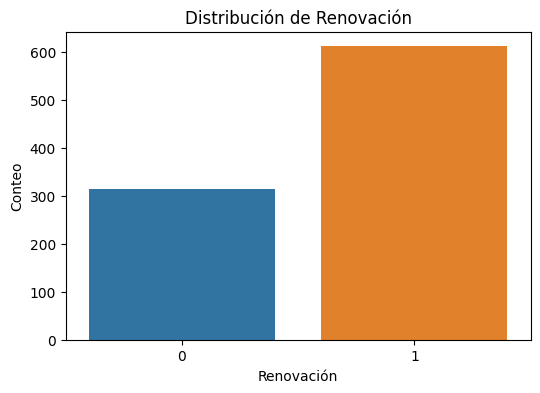

In [7]:
# 3. Visualización de Datos
# Gráfico de barras para la variable 'Renovación'
plt.figure(figsize=(6, 4))
sns.countplot(x='Renovado', data=df)
plt.title('Distribución de Renovación')
plt.xlabel('Renovación')
plt.ylabel('Conteo')
plt.show()

Se tienen 612 renovaciones y 315 no renovaciones para un total de 927 observaciones.

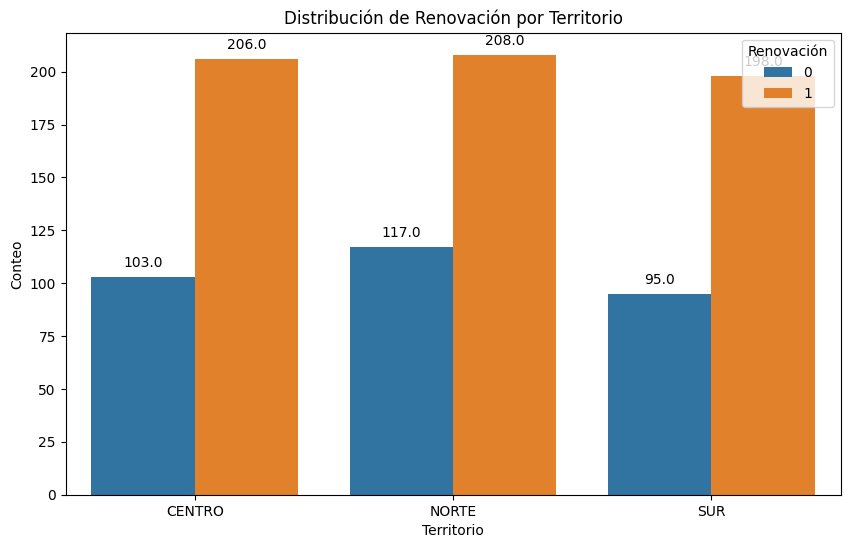

In [10]:
# Gráfico de barras para la variable 'Territorio' con etiquetas
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Territorio', hue='Renovado', data=df)

# Agregar etiquetas a las barras
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Distribución de Renovación por Territorio')
plt.xlabel('Territorio')
plt.ylabel('Conteo')
plt.legend(title='Renovación', loc='upper right')
plt.show()


Centro tiene 309 créditos de los cuales renovó 206 y quedaron pendientes 103.

Norte tiene 325 créditos de los cuales renovó 208 y quedaron pendientes 117.

Sur tiene 293 créditos de los cuales renovó 198 y quedaron pendientes 95.


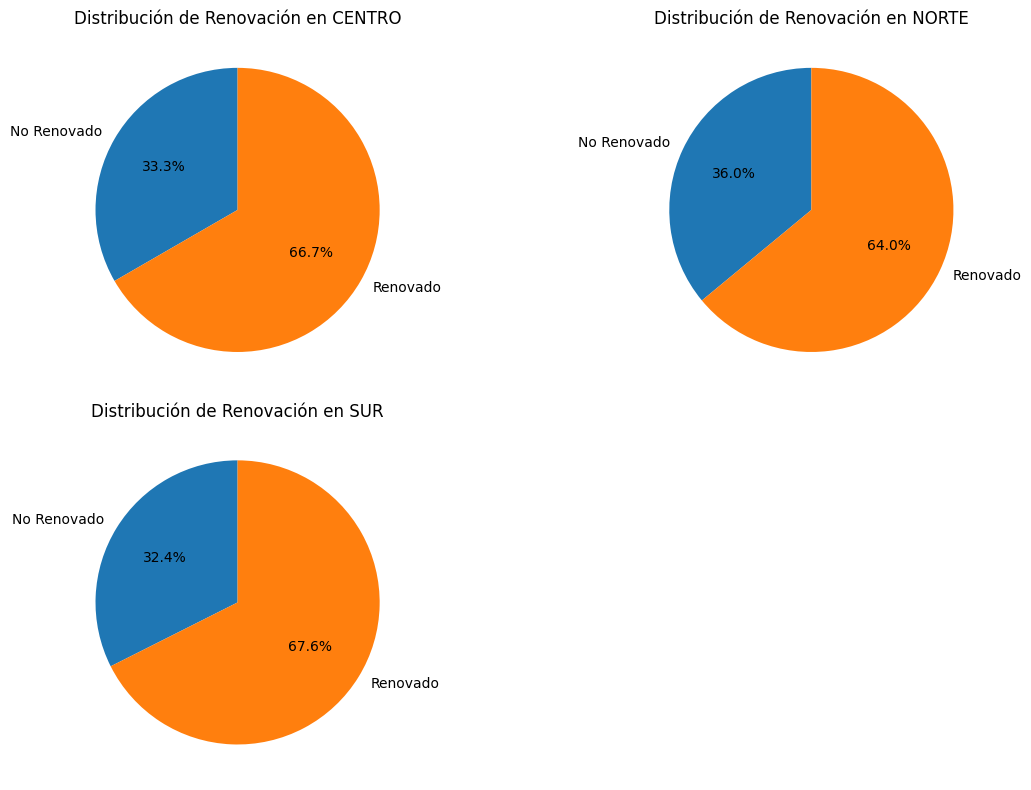

In [19]:
# Calcular proporciones por territorio y renovación
proporciones = df.groupby(['Territorio', 'Renovado']).size() / df.groupby('Territorio').size()

# Convertir a DataFrame y resetear el índice
proporciones_df = proporciones.reset_index(name='Proporcion')

# Crear un diccionario con las proporciones por territorio
proporciones_por_territorio = {territorio: proporciones_df[proporciones_df['Territorio'] == territorio]['Proporcion'].tolist() for territorio in df['Territorio'].unique()}

# Gráfico de pastel para la variable 'Territorio' con proporciones
plt.figure(figsize=(12, 8))

for i, territorio in enumerate(df['Territorio'].unique()):
    plt.subplot(2, 2, i + 1)
    plt.pie(proporciones_por_territorio[territorio], labels=['No Renovado', 'Renovado'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Renovación en {territorio}')

plt.tight_layout()
plt.show()


De acuerdo a las gráficas de pastel, por territorio el que renovó menos en proporción fue norte con 64% le sigue sur con 67.6% y después centro con 66.7%